# Setup

In [1]:
import tensorflow as tf
from tensorflow.python.summary.summary_iterator import summary_iterator
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
def get_section_results(file):
    eval_returns = {}
    for e in summary_iterator(file):
        for v in e.summary.value:
            if v.tag not in eval_returns:
                eval_returns[v.tag] = [v.simple_value]
            else:
                eval_returns[v.tag].append(v.simple_value)
    return eval_returns

In [12]:
tb_filenames = os.listdir("data/")
for i in range(len(tb_filenames)):
    tb_filenames[i] = "data/" + tb_filenames[i]
    tb_filenames[i] = tb_filenames[i] + "/" + os.listdir(tb_filenames[i])[0]
    
pprint(tb_filenames)

['data/q1_sb_no_rtg_dsa_CartPole-v0_22-09-2020_15-24-20/events.out.tfevents.1600813460.Aryans-MacBook-Pro.local',
 'data/q4_b100000_r0.05_nnbaseline_HalfCheetah-v2_23-09-2020_13-52-30/events.out.tfevents.1600894350.Aryans-MacBook-Pro.local',
 'data/q1_lb_rtg_na_CartPole-v0_22-09-2020_16-13-29/events.out.tfevents.1600816409.Aryans-MacBook-Pro.local',
 'data/q4_b100000_r0.05_rtg_HalfCheetah-v2_23-09-2020_12-07-00/events.out.tfevents.1600888020.Aryans-MacBook-Pro.local',
 'data/q4_search_b100000_lr0.05_rtg_nnbaseline_HalfCheetah-v2_22-09-2020_23-11-59/events.out.tfevents.1600841519.Aryans-MacBook-Pro.local',
 'data/q4_search_b10000_lr0.01_rtg_nnbaseline_HalfCheetah-v2_22-09-2020_22-26-09/events.out.tfevents.1600838769.Aryans-MacBook-Pro.local',
 'data/q1_sb_rtg_na_CartPole-v0_22-09-2020_18-47-13/events.out.tfevents.1600825633.Aryans-MacBook-Pro.local',
 'data/q4_search_b50000_lr0.01_rtg_nnbaseline_HalfCheetah-v2_22-09-2020_22-32-49/events.out.tfevents.1600839169.Aryans-MacBook-Pro.local',

In [15]:
pprint(get_section_results(tb_filenames[0]).keys())

dict_keys(['Eval_AverageReturn', 'Eval_StdReturn', 'Eval_MaxReturn', 'Eval_MinReturn', 'Eval_AverageEpLen', 'Train_AverageReturn', 'Train_StdReturn', 'Train_MaxReturn', 'Train_MinReturn', 'Train_AverageEpLen', 'Train_EnvstepsSoFar', 'TimeSinceStart', 'Training_Loss', 'Initial_DataCollection_AverageReturn'])


q1_sb_no_rtg_dsa_CartPole-v0
q4_b100000_r0.05_nnbaseline_HalfCheetah-v2


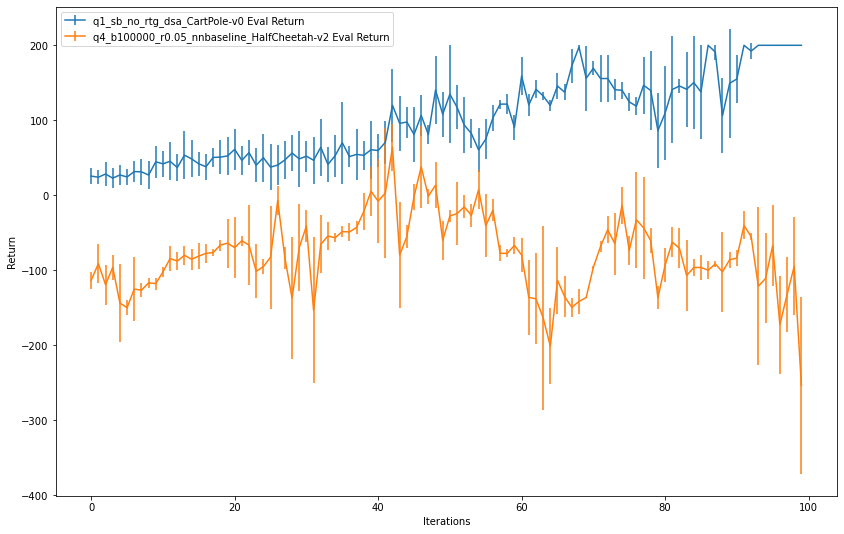

In [28]:
def plot_eval_return(filename, experiment_name = ""):
    if experiment_name == "":
        experiment_name = filename[5:]
        experiment_name = experiment_name[:experiment_name.index("/")]
        experiment_name = experiment_name[::-1]
        experiment_name = experiment_name[experiment_name.index("_")+1:]
        experiment_name = experiment_name[experiment_name.index("_")+1:]
        experiment_name = experiment_name[::-1]
        print(experiment_name)
    data = get_section_results(filename)
    eval_avg_return = data['Eval_AverageReturn']
    eval_std = data['Eval_StdReturn']
    iters = np.arange(len(eval_avg_return))
    plt.errorbar(iters, eval_avg_return, eval_std, label = experiment_name + " Eval Return")
    plt.xlabel("Iterations")
    plt.ylabel("Return")
    plt.legend()
    
def plot_train_return(filename, experiment_name = ""):
    if experiment_name == "":
        experiment_name = filename[5:]
        experiment_name = experiment_name[:experiment_name.index("/")]
        experiment_name = experiment_name[::-1]
        experiment_name = experiment_name[experiment_name.index("_")+1:]
        experiment_name = experiment_name[experiment_name.index("_")+1:]
        experiment_name = experiment_name[::-1]
        print(experiment_name)
    data = get_section_results(filename)
    eval_avg_return = data['Train_AverageReturn']
    eval_std = data['Train_StdReturn']
    iters = np.arange(len(eval_avg_return))
    plt.errorbar(iters, eval_avg_return, eval_std, label = experiment_name + " Eval Return")
    plt.xlabel("Iterations")
    plt.ylabel("Return")
    plt.legend()

plt.figure(figsize=(14, 9))
plot_eval_return(tb_filenames[0])
plot_eval_return(tb_filenames[1])

# Question 1